<a href="https://colab.research.google.com/github/cromakicuki/ai/blob/main/22_02_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Binary Search 이진 탐색법

# 이진 탐색법은 탐색하는 범위를 절반씩 줄여서 탐색하는 방법이다.
# 데이터들이 먼저 오름차순이나 내림차순으로 정렬되어 있어야만 쓸 수 있다.
#(정렬 되어있지 않으면 할 수 없다)

11, 13, 17, 19, 23, 29, 31  # <- 찾는 값은 17

# 1st
# 0   1   2   3   4   5   6     제일 가운데 있는 3번
#             --
#             19               <-- 찾고 있는 17이 아니다
# 0   1   2
#    --                        <-- 찾고 있는 17이 아니다
# 2
# --
# 17                           <-- 찾고 있던 17을 발견

# 이진 탐색법의 알고리즘
# 1. 가운데 요소를 선택 (평균을 이용한다. )
# - 짝수인 상태여도 소수를 버리고 일정한 부분을 절반으로 줄이기 때문에 큰 문제는 되지 않는다.
# 2. 가운데 요소의 데이터와 찾는 데이터를 비교
# 3. 탐색 범위를 절반으로 줄이는 처리

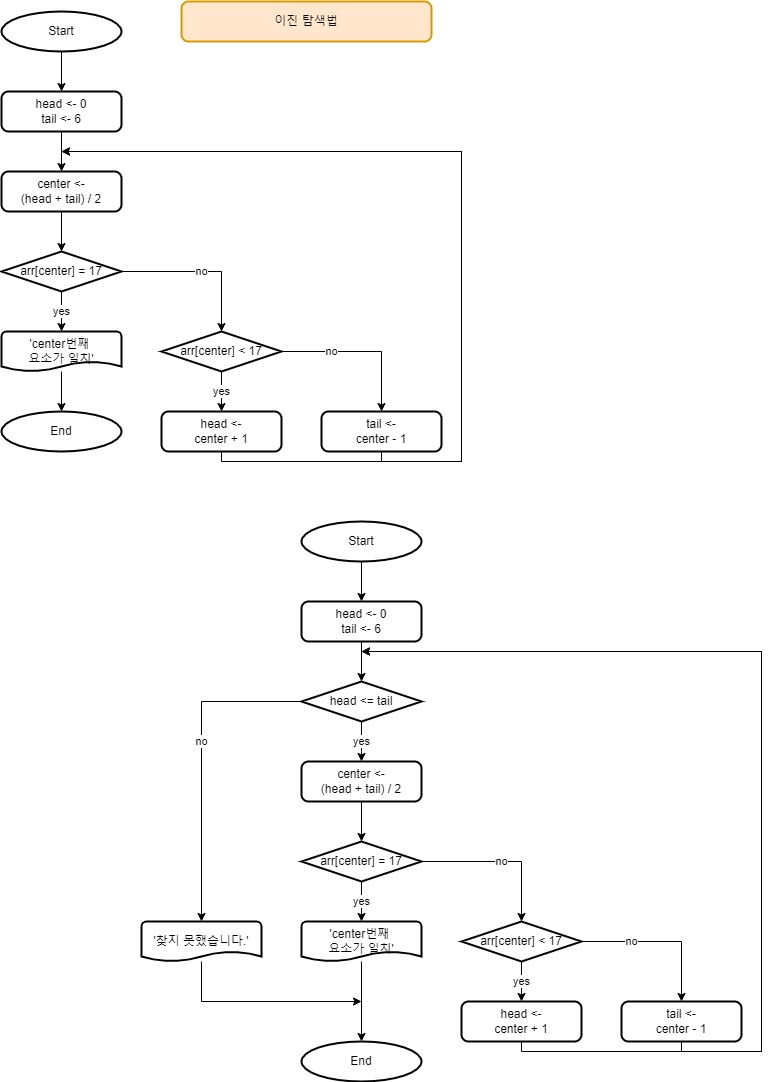

In [ ]:
##########################################
# 해시 탐색법
##########################################

# 선형 탐색이나 이진 탐색의 전제 조건은 어떤 데이터가 어떤 요소(index)에 있는지
# 전혀 모르는 상태에서 검색을 시작한다는 것이다.
# 그러나 해시 탐색법은 데이터의 '내용'과 저장한 곳의 '요소'를 미리 저장할때
# 연계를 해서 극히(***) 짧은 시간 안에 탐색할 수 있도록 고안한 알고리즘이다.

# (이 탐색법의 문제)
# 24 인 데이터는 첨자 24에 넣어두고 36 데이터는 첨자 36에 넣어두는 것이다.
# 단지 2개의 데이터를 보관하는데 최소한 37의 요소의 배열이 필요하다.
# 낭비가 심해진다.

# 해시 탐색법의 특징은 나중에 데이터를 쉽게 찾도록 보관하는 단계에서 사전 준비를 
# 해두는 것이 특징이다.

# 11  15  23  26

# 가장 알기 쉬운 방법은 데이터를 데이터의 숫자와 같은 방에 넣어두는 것이다.
# 하지만 메모리의 불필요한 누수가 커진다.
# 따라서, 

# 먼저 방을 7개를 준비한다. index 0 ~ index 6

# 0  1  2  3  4  5  6

# 11 15 23 26
# 11 % 7( index의 수) = 4
# 15 % 7              = 1
# 23 % 7              = 2
# 26 % 7              = 5

# 0  1  2  3  4  5  6
#   15  23    11 26

# 제대로 흩어진 상태가 되었다. 
# 각각의 데이터를 나머지 값과 같은 번호의 방에 넣어 둔다.

# 데이터를 넣은 방의 번호를 계산하는 식은

#       방번호 = 데이터 % 7 (방의 갯수)  <-  해시 함수

# 해시 탐색법으로 데이터 찾는 방법

# 11이라는 데이터를 찾아보자. 찾을 때도 저장할 때 사용한 해시 함수를 다시 사용한다.
# 저장할 때의 계산식은 '데이터 값 % 7' 이고 해시값은 4이며 인덱스 번호를 나타낸다.

# 따라서 해시 탐색법을 사용하면 단 한번의 계산으로 찾고자 하는 공을 찾을 수 있다. 
# 검색 시간을 놀라울 정도로 단축시킬 수 있다는 큰 장점이 있다. 

# # 해시 함수로 데이터를 보관하는 알고리즘
# - 해시 함수는 데이터의 저장소 첨자를 계산한다.
# - 저장소의 첨자가 겹치는 것을 '충돌'이라고 한다. 
# - 충돌이 발생하면 옆의 빈 요소에 데이터를 보관한다. 

# 1. 배열은 2개 준비한다.

# -첫번째 배열은 데이터의 갯수만큼 준비한다. (임시배열) array0
# 0  1  2  3  4   5  6
# 12 25 36 20 30  8  42
# -두번째 배열은 11개 준비하여 0으로 초기화한다. (실제 저장될 배열) arrayH
# 0 1 2 3 4 5 6 7 8 9 10
# 0 0 0 0 0 0 0 0 0 0 0 

# arrayD 첫번째 요소부터 순차적으로 해시값을 계산하여 arrayH로 저장한다.
# 지금은 요소수가 11개이므로 11로 나눈 나머지를 계산하여 저장한다.

#     해시값 = arrayD데이터 % 11 (해시함수)

# 첫 번째 arrayD[0] = 12 를 해시함수에 넣어 계산하면 해시값은 1이 된다.

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  0  0  0  0  0  0  0  0

# 이미 다른 데이터가 할당 되어 있는지 확인하여 비어있으면 대입한다.
# 왜 확인이 필요하느냐는 다음에 자세히 나오지만 요소가 많으면 해시 값이
# 즉, 나머지 값이 우연히 일치하는 경우가 많아 이미 데이터가 저장되어 있을
# 가능성이 높다.

# 요소가 비어 있는지 확인 하려면 0이 있는지 확인하면 된다.

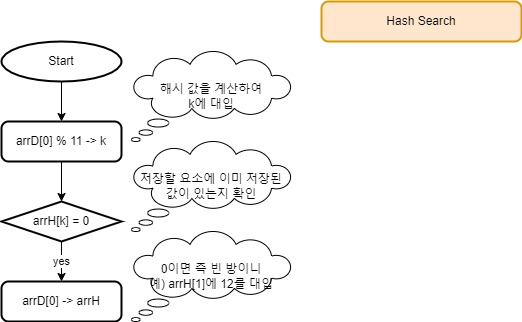

In [ ]:
arrD[0] 이후의 데이터들도 마찬가지로 같은 절차를 사용하여 데이터들을 순차적으로
arrH로 저장한다. 따라서 반복 구조를 사용한다.

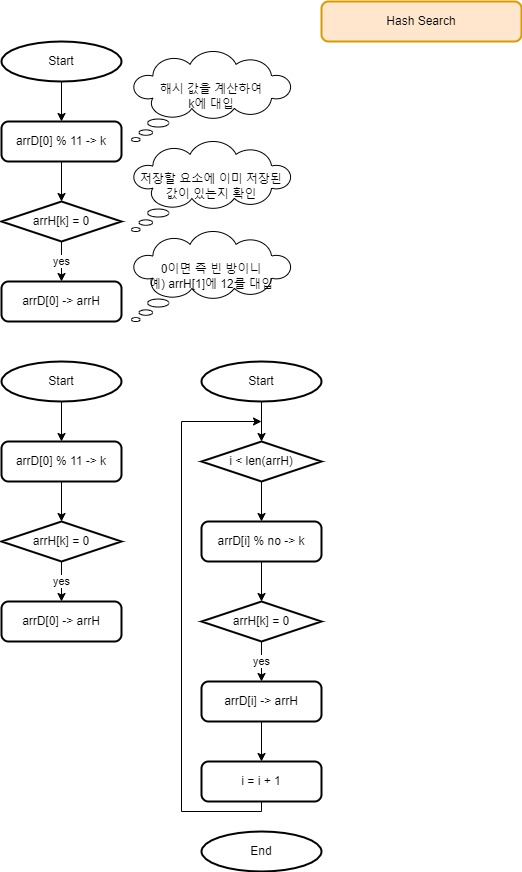

In [ ]:
종료 조건도 필요하다 i 의 최대값은 6이므로 7이 되었을 때 반복을 종료하도록 한다.

In [ ]:
# 0  1  2  3  4   5  6
# 12 25 36 20 30  8  42

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  0  0  0  0  0  0  0  0

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25  0  0  0  0  0  0  0

addD[2]의 데이터 36의 해시값은 3이다. 이미 데이터 25가 존재한다.

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25  0  0  0  0  0  0  0
           -- 이미 25가 들어가 있어서 넣을 수 없다.
해시 탐색법에서는 이러한 해시값이 이미 존재하는 것을 '충돌' synonym 이라고 한다.

이러한 충돌이 발생하는 경우 즉 arrH[k] = 0 이 아닌 No의 경우 처리를 생각해야한다.
해결책은 간단하다. 바로 옆의 요소가 비어 있으면 거기에 넣으면 된다.
arrH[k]옆의 요소는 arrH[k+1] 이다. k값을 하나 증가시켜 0인지의 여부를 확인한다.

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0  0  0  0  0
              --

**** 충돌에 대하여
충돌이 너무 자주 일어나면 추가적인 처리가 많이 필요하게 된다.
해시탐색법의 장점이 무색해진다.
충돌이 일어나지 않게 하려면 데이터가 많이 흩어지도록 해야한다.

요소가 많아질수록 충돌의 가능성은 적어지지만 메모리의 사용량이 늘어나
알고리즘의 효율성이 떨어지게 된다.

탐색 처리의 속도를 유지하는 것과 가능한 메모리를 적게 사용하는 요소의 수는
일반적으로 저장 데이터 수의 1.5배에서 2배라고 알려져 있다.

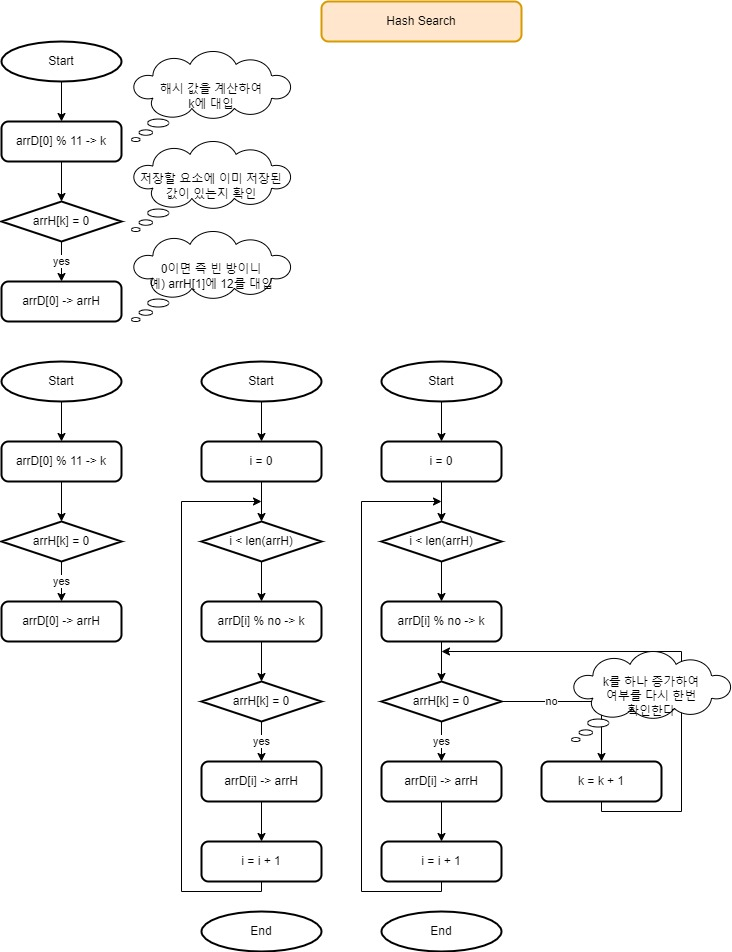

In [ ]:
# 0  1  2  3  4   5  6
# 12 25 36 20 30  8  42
  -- -- -- --

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0  0 0  20  0

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0 0  30 20  0

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0 0  30 20  0
                          --   <- 8 충돌 발생

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0 0  30 20  0
                          -- --    <- 8 충돌 발생

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0 0  30 20  8
                                 --

마지막 요소인 42는 해시값이 9다. arrH[9]에 이미 데이터가 존재하고 
arrH[10]에도 이미 데이터가 존재한다. 그리고 그 이상의 값은 없다.

좀 더 간단한 방법을 사용해보자. k를 하나 증가시키는 처리 k + 1 -> k 의
k+1을 arrH의 요소수로 나누어 그나머지를 k에 대입하는 방법이다. 즉
(k+1) % 11 -> k를 사용한다.

k 값이 0에서 10인 경우에는 11로 나눌 필요가 없지만 k값이 10을 초과하는 경우의
처리를 별도로 준비하는 것은 비효율적이다. 두 경우 모두 11로 나누는 처리를 
거친 값을 대입한다. k값이 0에서 10인 경우에는 이 과정을 거친 후에도 원래 값과
같아서 문제가 없다.
k가 10 넘어 11이 된다면 나머지가 0이 되서 (11% 11 = 0) 맨 앞 요소에 다시 
할당할 수 있는 장소를 찾게 된다.
만약, arrH[0]에도 이미 데이터가 있다면 k는 12 이므로 12 % 11 = 1이 되어 바로 옆칸을
확인하는 처리르 진행하게 된다. 언젠가는 빈칸을 발견하게 된다.


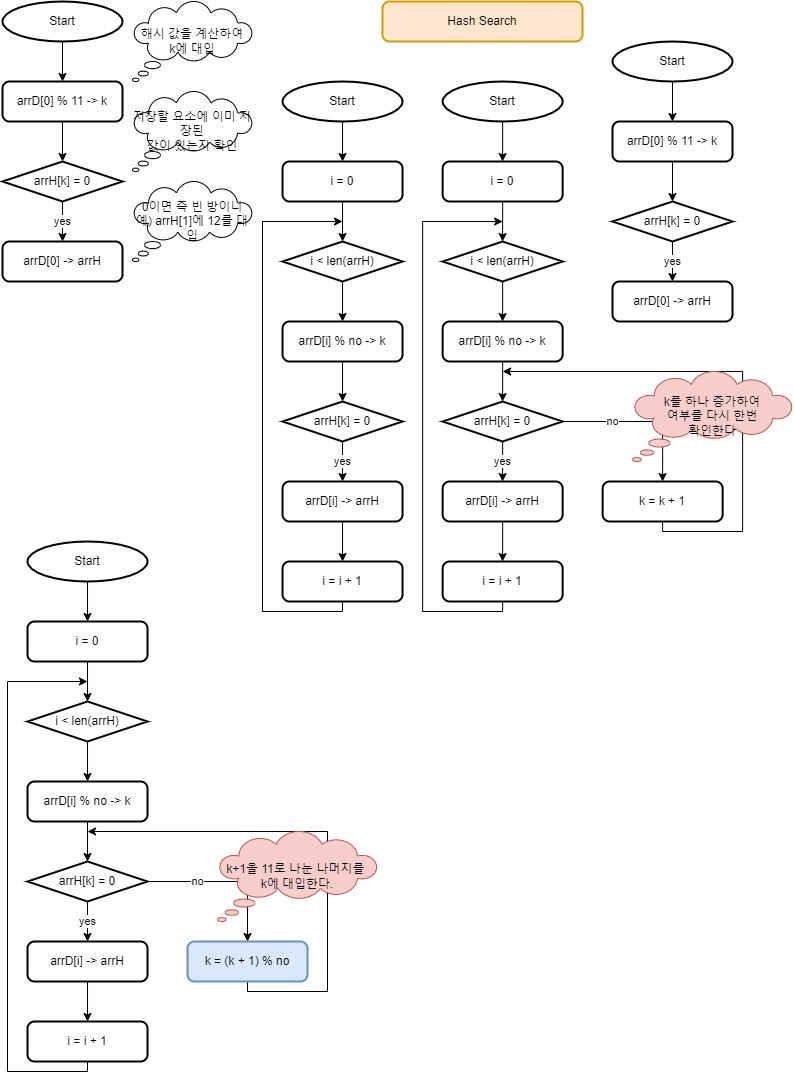

In [ ]:
마지막 데이터 42를 할당하고 i가 7이 되어 반복처리를 종료하고 끝내게 된다.
이제 arrD에 있는 7개의 데이터가 모두 arrH의 요소에 저장되었다.

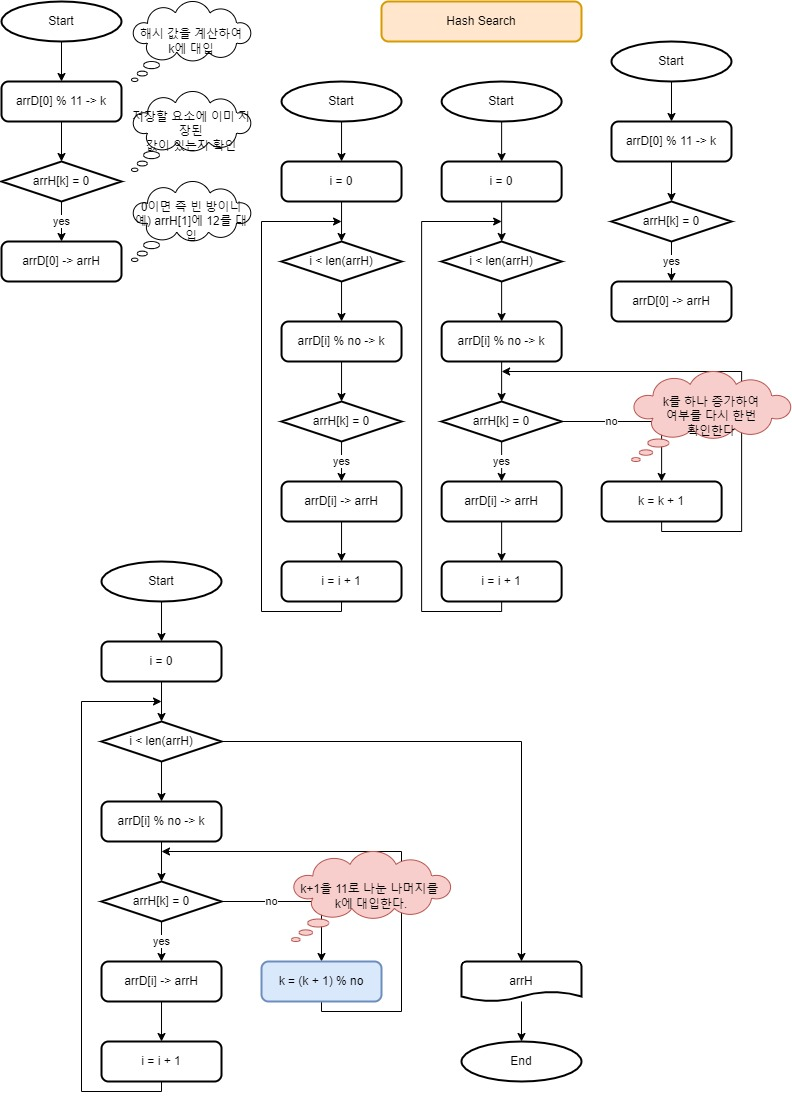

In [ ]:
############################################
# 해시 탐색법으로 데이터를 탐색하는 알고리즘
############################################

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0 0  30 20  8

찾을 때도 저장할 때 사용한 것고 같은 해시 함수를 사용하여 위치를 산출한다.

            해시값 = 데이터값 % 11
                      12 % 11 = 1 arrH[1]


[42, 12, 0, 25, 0, 0, 0, 0, 30, 20, 8]


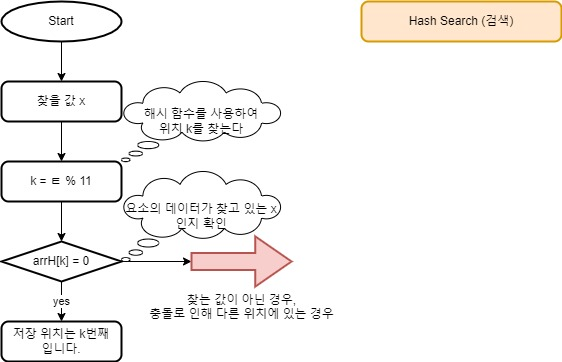

In [ ]:
# 저장할 때 충돌이 일어났던 36을 검색해보자.
# x에 36을 입력하면 해시 값은 3을 얻게 된다.
# arrH[3] 이미 25라는 다른 데이터가 존재하고 있다.

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  25 36  0  0 0  30 20  8
           --
이것은 찾고 있는 데이터 36이 아니다. 이럴 경우 저장했을 때와 마찬가지로
k를 하나 증가시켜 옆자리를 찾게 된다. 저장할 때 사용한 k가 10을 넘어도
문제가 생기지 않도록 미리 (k+1) % 11 를 사용하자.


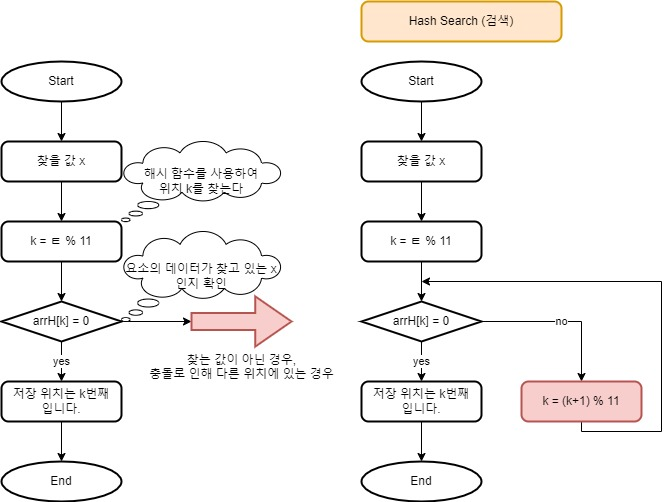

In [ ]:
# 검색하고 있는 데이터가 존재하지 않을 경우

# 현재는 찾는 데이터가 존재하지 않는 경우 무한 루프가 발생된다.

탐색 데이터가 발견되지 않으면 k값을 점점 증가하다가 다시 처음부터 검색하고 이 과정이 계속 반복된다.
그러면 과연 어디까지 찾아야 존재하지 않는다고 말할 수 있을까... 바로 데이터가 보관되지 않은 요소가 나왔을 때까지이다.

만약 데이터가 존재한다면 설사 저장할 때 충돌이 발생하여 어딘가 다른 요소에 저장되어 있다하도  
저장 위치를 찾을 때까지의 사이에 데이터가 0인 요소는 절대 있을 수 없다.

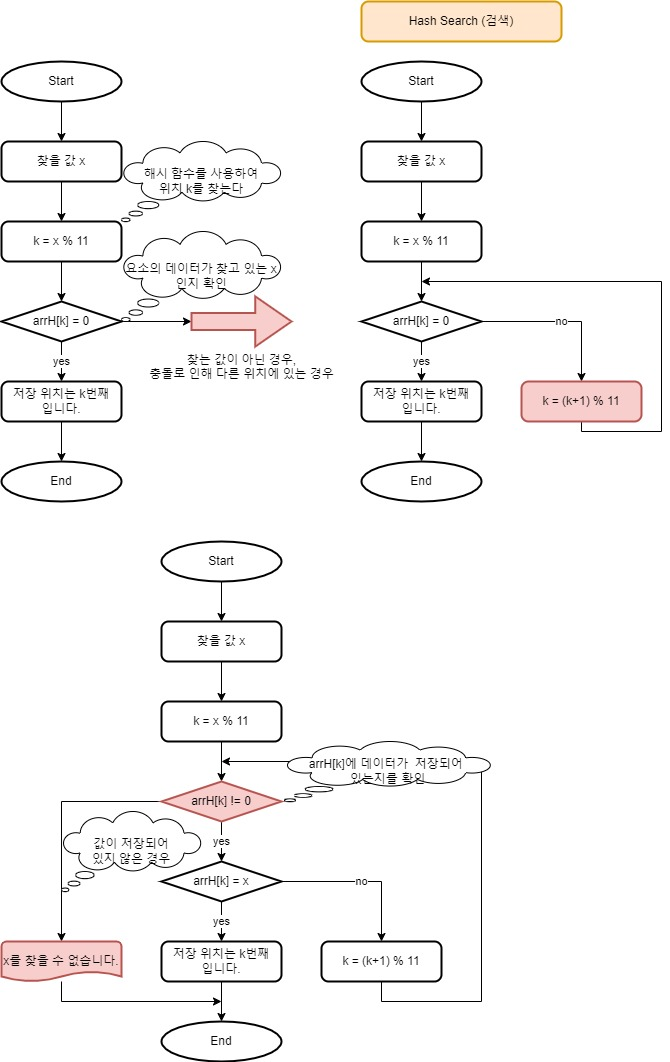

In [ ]:
# 이진탐색법 해서 깃허브에 올려서 링크를 주기

In [ ]:
#####################################################

In [ ]:
# # 예외 처리 고급

# 프로그램을 개발하다 보면 수많은 오류를 만나게 된다. 또한 처음 프로그램을 개발했을 때 
# 모든 오류를 예측하고 처리할 수는 없다. 개발이 완료된 후에도 예측하지 못한 오류들이 계쏙 발생되기 때문에
# 유지보수가 필요하다.

# try:
#   예외 발생 가능성 있는 구문
# except:
#   예외가 발생했을 때 실행할 구문


# try:
#   예외 발생 가능성 있는 구문
# except 예외의 종류 as e (예외 객체를 활용할 변수 이름):
#   예외가 발생했을 때 실행할 구문

# 예외 발생하면 예외 정보가 생기고 예외 정보는 예외 객체에 저장되어 생성된다.

# 예외 객체

try:
  num = int(input('정수를 입력하세요'))

  print('입력한 정수:',num)

except Exception as e:
  print('type(exception):',type(e))
  print('exception:',e)

# 만약 큰 규모의 웹 서비스를 구축하게 된다면 다양한 예외가 분명히 발생한다.
# 예외가 발생할 때 그 정보를 수집하면 이후 프로그램을 유지/보수하는데 큰 도움이 된다.

정수를 입력하세요2cm
type(exception): <class 'ValueError'>
exception: invalid literal for int() with base 10: '2cm'


In [ ]:
# 예외 구분하기

list = [52,273,32,72,100]

try:
  num = int(input('정수 입력 >>>:'))
  print(f'{num}번째 요소 : {list[num]}')

# except Exception as e:
#   print('type(exception):',type(e))
#   print('exception:',e)

except ValueError:
  print('정수를 입력하셔야만 합니다.')

except IndexError:
  print('리스트 크기보다 큰 수는 입력하실 수 없습니다.')

정수 입력 >>>:6
리스트 크기보다 큰 수는 입력하실 수 없습니다.


In [ ]:
list = [52,273,32,72,100]

try:
  num = int(input('정수 입력 >>>:'))
  print(f'{num}번째 요소 : {list[num]}')
  # 예외 발생()

# except Exception as e:
#   print('type(exception):',type(e))
#   print('exception:',e)

except ValueError as e:
  print('정수를 입력하셔야만 합니다.')
  print('type(exception):',type(e))
  print('exception:',e)
except IndexError as e:
  print('리스트 크기보다 큰 수는 입력하실 수 없습니다.')
  print('type(exception):',type(e))
  print('exception:',e)

except Exception as e:
  # 나머지 모든 예기치 못한 예외를 여기서 처리하자
  print('미리 파악하지 못한 예외 발생')
  print('type(exception):',type(e))
  print('exception:',e)


# 너무 치명적인 문제인데도 프로그램 강제 종료되지 않게 만들면 그것으로 또 다른 
# 더욱 커다란 문제가 될 수 있으므로 상황에 맞게 대처할 수 있어야 한다.

# 큰 규모의 프로그램을 개발할 때는 '예외 처리로 떡칠한다'라고 표현할 정도로 예외 처리를
# 많이 사용하게 된다.

# 예외 처리에서 가장 중요한 것은 '이 코드에서 어떤 예외가 발생할 것인가?'를
# 미리 잘 예측하는 것이다.

정수 입력 >>>:5
리스트 크기보다 큰 수는 입력하실 수 없습니다.
type(exception): <class 'IndexError'>
exception: list index out of range


In [ ]:
# 예외를 강제로 발생시키기.raise

num = int(input('정수입력 >>>'))

if num > 0:
  raise NotImplementedError
else:
  raise NotImplementedError


정수입력 >>>12


NotImplementedError: ignored

In [ ]:
# 모듈
# 여러 변수와 함수를 가지고 있는 집합체
# 파이썬에 기본적으로 내장되어 있는 모듈을 '표준 모듈'이라고 부르고
# 다른 사람이 만들어서 공개한 모듈을 '외부 모듈'이라고 부른다.


In [ ]:
# math 모듈 - 수학과 관련된 기능들을 가진 모듈

import math

print(math.sin(1))
print(math.cos(1))
print(math.tan(1))

# ceil() 올림
# floor() 내림
# round() 반올림


0.8414709848078965
0.5403023058681398
1.5574077246549023


In [ ]:
# from math import sin, cos, tan # 특정 매서드 들만 가져와서 사용
from math import *  # 모든 매서드 다 가져와서 사용 (하지만 정답은 아니다. 특정 것을 가져오는것이 더 효율적)

print(sin(1))
print(cos(1))
print(tan(1))

In [ ]:

import math as m

print(m.sin(1))
print(m.cos(1))
print(m.tan(1))


0.8414709848078965
0.5403023058681398
1.5574077246549023


In [ ]:
# 외부 모듈 설치 하고 import

# pip install 모듈명
# !pip install selenium

import selenium

In [ ]:
# random 모듈 - 랜덤한 숫자를 생성해주는 모듈
import random

print('# random 모듈')

# 기본적으로 0.0 에서 1.0 사이의 float 으로 난수를 발생시킨다.
print(' - random() :',random.random())

# uniform(min, max) : 지정한 범위 사이의 float를 발생시킨다.
print(' - random(10,20) :',random.uniform(10,20))

# randrange() : 지정한 범위의 int를 발생시킨다.
print(' - randrange(10,20) :',random.randrange(10,20))
print(' - randrange(10) :',random.randrange(10))

# choice(list): 리스트 내부에 있는 요소를 랜덤하게 선택한다.
print(' - choice([1,2,3,4,5]) :',random.choice([1,2,3,4,5]))


# sample(list, k=숫자) : 리스트의 요소 중 k개를 랜덤하게 뽑아준다.
print(' - sample([1,2,3,4,5], k=2) :',random.sample([1,2,3,4,5],k=2))

# shuffle(list) : 리스트의 요소들을 랜덤하게 섞어준다.
# shuffle은 파괴적 처리를 하기 때문에 먼저 섞는 작업을 하고 나서 출력한다.
list = ['1','2','3','4','5']
random.shuffle(list)
print(' - shuffle([1,2,3,4,5]) :', list)



# random 모듈
 - random() : 0.16471082800287762
 - random(10,20) : 19.252914341198114
 - randrange(10,20) : 17
 - randrange(10) : 6
 - choice([1,2,3,4,5]) : 2
 - shuffle([1,2,3,4,5]) : ['3', '5', '1', '2', '4']
 - sample([1,2,3,4,5], k=2) : [5, 3]


In [ ]:
# 로또 당첨 번호 추천 인공지능 시스템을 개발하였다.
# 매주 5개의 1등 완전 당첨 번호를 판매를 시작한다.
# 실행하면 5개의 로또 번호를 보여주는 프로그램을 작성하시오.


# 중첩 제거는 하지 않음
li = [0,0,0,0,0,0]
for i in range(5):
  for j in range(6):
    li[j] = random.randrange(1,47)

  print(li)
  li = [0,0,0,0,0,0]

[32, 42, 44, 38, 38, 26]
[23, 29, 25, 16, 40, 5]
[34, 41, 43, 23, 12, 44]
[29, 46, 26, 33, 33, 2]
[41, 26, 33, 19, 12, 4]


In [ ]:
# os 모듈

import os

print('현재 운영체제',os.name)
print('현재 작업폴더',os.getcwd())
print('현재 폴더 내부',os.listdir())

# os.mkdir('hello2')
print('현재 폴더 내부',os.listdir())
os.mkdir('hello')
print('현재 폴더 내부',os.listdir())

현재 운영체제 posix
현재 작업폴더 /content
현재 폴더 내부 ['.config', 'hello2', 'sample_data']
현재 폴더 내부 ['.config', 'hello2', 'sample_data']


FileExistsError: ignored

In [ ]:
# urllib 크롤링 웹 접근 라이브러리

from urllib import request

target = request.urlopen('https://music.bugs.co.kr/chart')
output = target.read()

print(output)

b'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t<!-- bgsweb-www903 -->\r\n\t<meta charset="utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t<meta name="keywords" content="\xec\x9d\x8c\xec\x95\x85,\xec\x9d\x8c\xec\x95\x85 \xec\x8a\xa4\xed\x8a\xb8\xeb\xa6\xac\xeb\xb0\x8d,\xec\xb5\x9c\xec\x8b\xa0\xec\x9d\x8c\xec\x95\x85,\xec\x9d\xb8\xea\xb8\xb0\xea\xb0\x80\xec\x9a\x94,\xeb\xae\xa4\xec\xa7\x81\xeb\xb9\x84\xeb\x94\x94\xec\x98\xa4,\xec\x95\xa8\xeb\xb2\x94,\xed\x94\x8c\xeb\xa0\x88\xec\x9d\xb4\xec\x96\xb4,mp3 \xeb\x8b\xa4\xec\x9a\xb4\xeb\xa1\x9c\xeb\x93\x9c,\xeb\x86\x80\xeb\xa9\xb4\xeb\xad\x90\xed\x95\x98\xeb\x8b\x88,\xec\x9c\xa0\xed\x94\x8c\xeb\x9e\x98\xec\x89\xac,\xec\x9c\xa0\xed\x94\x8c\xeb\x9e\x98\xec\x8b\x9c" />\r\n\r\n<script type="text/javascript">\r\n\tif(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))\r\n\t\tdocument.domain = \'bugs.co.kr\';\r\

In [ ]:
# 외부 모듈
# 파이썬이 기본적으로 제공해주는 것이 아니라 누군가가 만들어서 배포하는 모듈을 말한다.

# !pip install pybithumb
import pybithumb
import time

while True:
  print(pybithumb.get_current_price('BTC'))
  time.sleep(1)

In [ ]:
tickers = pybithumb.get_tickers()
for ticker in tickers:
  price = pybithumb.get_current_price(tickers)
  print(ticker, price)
  time.sleep(1)

In [65]:
print(pybithumb.get_market_detail('BTC'))
# 저가, 고가, 평균, 거래량

(53309000.0, 54123000.0, 52214000.0, 52796000.0, 2922.96642417)


In [ ]:
!pip install pykorbit

In [68]:
import pykorbit

print(pykorbit.get_current_price('BTC'))
print(pybithumb.get_current_price('BTC'))

52839000.0
52797000.0
